In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as o
from sklearn import preprocessing

In [2]:
df_pcp2 = pd.read_excel(r'Aluguel_m2_sp.xlsx')
df_pcp2.head()

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00
1,1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
2,2,2470281613,Zap Imóveis,Vila Romana,Zona Oeste,São Paulo,Aluguel,0,436,3000,120,3,0,1,0,25.00
3,3,2470329583,Zap Imóveis,Vila Sônia,Zona Oeste,São Paulo,Aluguel,348,2200,3500,130,3,3,3,3,26.92
4,4,2470407781,Zap Imóveis,Vila Olímpia,Zona Oeste,São Paulo,Aluguel,503,1080,5120,64,0,0,2,2,80.00


In [3]:
# Removendo coluna inútil

df_pcp2 = df_pcp2.drop(columns = ['Unnamed: 0'])
display(df_pcp2)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00
1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
2,2470281613,Zap Imóveis,Vila Romana,Zona Oeste,São Paulo,Aluguel,0,436,3000,120,3,0,1,0,25.00
3,2470329583,Zap Imóveis,Vila Sônia,Zona Oeste,São Paulo,Aluguel,348,2200,3500,130,3,3,3,3,26.92
4,2470407781,Zap Imóveis,Vila Olímpia,Zona Oeste,São Paulo,Aluguel,503,1080,5120,64,0,0,2,2,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227357,2435705692,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,54,587,1500,40,1,0,0,1,37.50
227358,2466031374,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,134,1200,25,1,0,0,1,48.00
227359,2465099798,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,133,401,2200,82,2,0,0,2,26.83
227360,2462102392,Zap Imóveis,Aclimação,Centro,São Paulo,Aluguel,248,0,2300,95,2,0,0,1,24.21


In [4]:
# Removendo valores com 0


df_pcp2 = df_pcp2[(df_pcp2.Zona != 0) & (df_pcp2.Bairro != 0) & (df_pcp2.Dormitorios != 0)]
display(df_pcp2)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00
1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
2,2470281613,Zap Imóveis,Vila Romana,Zona Oeste,São Paulo,Aluguel,0,436,3000,120,3,0,1,0,25.00
3,2470329583,Zap Imóveis,Vila Sônia,Zona Oeste,São Paulo,Aluguel,348,2200,3500,130,3,3,3,3,26.92
5,2470581699,Zap Imóveis,Belenzinho,Zona Leste,São Paulo,Aluguel,0,598,1780,72,2,0,1,2,24.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227357,2435705692,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,54,587,1500,40,1,0,0,1,37.50
227358,2466031374,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,134,1200,25,1,0,0,1,48.00
227359,2465099798,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,133,401,2200,82,2,0,0,2,26.83
227360,2462102392,Zap Imóveis,Aclimação,Centro,São Paulo,Aluguel,248,0,2300,95,2,0,0,1,24.21


In [5]:
df_pcp2.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
df_pcp2.describe()

,Id_Oferta,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
count,1.637940e+05,1.637940e+05,1.637940e+05,1.637940e+05,163794.000000,163794.000000,163794.000000,163794.000000,163794.000000,163777.000000
mean,2.445098e+09,9.051095e+02,1.503499e+03,5.138051e+03,110.370606,2.160891,0.850611,1.530044,2.080894,50.407346
std,2.648019e+08,4.658481e+04,2.509251e+04,5.938993e+04,180.671844,0.922395,0.994332,5.226306,1.382914,312.274680
min,3.539675e+07,0.000000e+00,0.000000e+00,1.000000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.060000
25%,2.475914e+09,4.000000e+01,4.410000e+02,2.070000e+03,50.000000,1.000000,0.000000,1.000000,1.000000,28.570000
50%,2.485376e+09,1.670000e+02,7.700000e+02,3.000000e+03,77.000000,2.000000,1.000000,1.000000,2.000000,40.000000
75%,2.492845e+09,4.040000e+02,1.340000e+03,5.200000e+03,139.000000,3.000000,1.000000,2.000000,3.000000,57.890000
max,2.500725e+09,1.750021e+07,5.200074e+06,2.300000e+07,60000.000000,4.000000,20.000000,1970.000000,99.000000,102222.220000


In [7]:
# Apenas studios e dormitórios simples e salvando como excel

df_studios = df_pcp2[df_pcp2.Dormitorios == 1]
df_studios.to_excel('tabela_aluguel_studios.xlsx')

In [8]:
# Verificando os limites inferiores da coluna aluguel a fim de eliminar valores muito baixos
# Primeiro o menor valor
df_pcp2['Valor_Aluguel'].min()


100

In [9]:
df_pcp2['Zona'].value_counts()

Zona Sul      72260
Zona Oeste    40995
Centro        29937
Zona Leste    10797
Zona Norte     9805
Name: Zona, dtype: int64

### Verificando uma margem mínima confiável do aluguel 

In [10]:
# Verificando se o valor mínimo após o minímo de aluguel é sequencial ou isolado

xx = df_pcp2[df_pcp2.Valor_Aluguel != 100]
xx.min()

Id_Oferta            35396750
Portal              Viva Real
Bairro              Aclimação
Zona                   Centro
Cidade              São Paulo
Status                Aluguel
Valor_Iptu                  0
Valor_Condominio            0
Valor_Aluguel             200
Area_Privativa              0
Dormitorios                 1
Suites                      0
Vagas                       0
Banheiros                   0
Aluguel_m2               0.06
dtype: object

In [11]:
df_pcp2['Valor_Aluguel'].mean()

5138.051418244869

<AxesSubplot:ylabel='Frequency'>

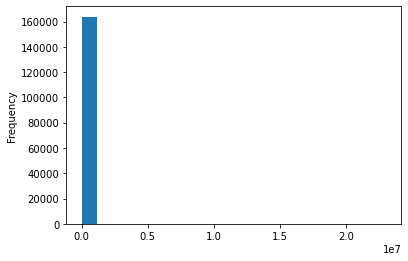

In [12]:
df_pcp2['Valor_Aluguel'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

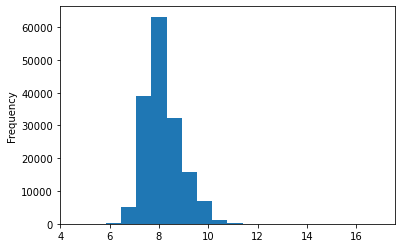

In [13]:
df_pcp2['log_Aluguel'] = np.log(df_pcp2['Valor_Aluguel'])
df_pcp2['log_Aluguel'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

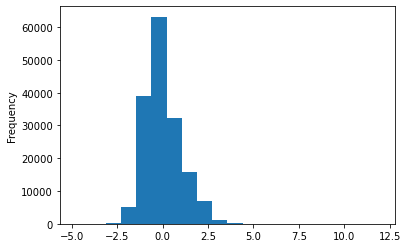

In [14]:
df_pcp2['n_log_Aluguel'] = ( df_pcp2['log_Aluguel'] - df_pcp2['log_Aluguel'].mean() ) / df_pcp2['log_Aluguel'].std()
df_pcp2['n_log_Aluguel'].plot.hist(bins=20)

In [15]:
shpr_log = st.shapiro(df_pcp2['n_log_Aluguel'])
shpr_log

C:\Users\GabrielMedina\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.96368408203125, pvalue=0.0)

In [16]:
# definindo uma variável para os dados de alugueis transformados
x = df_pcp2['n_log_Aluguel']
# calculando a média
mu = np.mean(x)
# calculando o desvio-padrão populacional
std = np.std(x)
#Imprimindo a média e o desvio-padrão
round(mu, 3),round(std, 3)

(-0.0, 1.0)

In [17]:
# calculando o intervalo de confiança para os dados transformados
# é esperado os valores de z_score
st.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.9599580015193347, 1.9599580015128688)

In [18]:
# armazenando os dados em variáveis 
ZscoreInf_alg = st.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
ZscoreSup_alg = st.norm.interval(alpha=0.95,loc=mu,scale=std)[1]
ZscoreInf_alg,ZscoreSup_alg

(-1.9599580015193347, 1.9599580015128688)

In [19]:
# fazendo a inferência para os dados de normal_log_salario  melhor usar apenaslog_
# para aluguel/m2 abaixo do limite inferior
min_alg = df_pcp2[df_pcp2['n_log_Aluguel']<ZscoreInf_alg]
display(min_alg)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel
112,2471280087,Zap Imóveis,Limao,Zona Norte,São Paulo,Aluguel,50,0,700,50,1,0,0,1,14.00,6.551080,-2.173426
328,2474064299,Zap Imóveis,Jardim Celeste,Zona Sul,São Paulo,Aluguel,50,550,800,52,2,0,0,1,15.38,6.684612,-1.992092
392,2480154630,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,600,25,1,0,0,1,24.00,6.396930,-2.382762
441,2475821024,Zap Imóveis,Vila Siqueira (Zona Norte),Zona Norte,São Paulo,Aluguel,0,0,750,50,1,0,0,1,15.00,6.620073,-2.079735
540,2475362354,Zap Imóveis,Vila Água Funda,Zona Sul,São Paulo,Aluguel,50,0,600,30,1,0,0,1,20.00,6.396930,-2.382762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226745,2500376277,Zap Imóveis,Jardim Peri,Zona Norte,São Paulo,Aluguel,0,0,750,52,1,0,0,2,14.42,6.620073,-2.079735
226914,2500466973,Zap Imóveis,Butantã,Zona Oeste,São Paulo,Aluguel,10,0,780,20,1,0,0,1,39.00,6.659294,-2.026473
227116,2500560491,Zap Imóveis,Jardim Anália Franco,Zona Leste,São Paulo,Aluguel,60,0,750,35,1,1,0,1,21.43,6.620073,-2.079735
227155,2500591481,Zap Imóveis,Vila Mascote,Zona Sul,São Paulo,Aluguel,750,3000,500,170,3,3,4,4,2.94,6.214608,-2.630353


In [20]:
# Maior valor dentro dos alugueis abaixo do z-score inferior.
# Consideraremos apenas os alugueis acima de 813

min_alg['Valor_Aluguel'].max()

813

### Testeando e normalizando o valor aluguel/m2 do dataset sem os alugueis inferiores.

In [83]:
df_alg1 = df_pcp2[(df_pcp2.Valor_Aluguel > 813)]
display(df_alg1)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190
1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50,7.003065,-1.559635
2,2470281613,Zap Imóveis,Vila Romana,Zona Oeste,São Paulo,Aluguel,0,436,3000,120,3,0,1,0,25.00,8.006368,-0.197160
3,2470329583,Zap Imóveis,Vila Sônia,Zona Oeste,São Paulo,Aluguel,348,2200,3500,130,3,3,3,3,26.92,8.160518,0.012175
5,2470581699,Zap Imóveis,Belenzinho,Zona Leste,São Paulo,Aluguel,0,598,1780,72,2,0,1,2,24.72,7.484369,-0.906030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227357,2435705692,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,54,587,1500,40,1,0,0,1,37.50,7.313220,-1.138447
227358,2466031374,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,134,1200,25,1,0,0,1,48.00,7.090077,-1.441474
227359,2465099798,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,133,401,2200,82,2,0,0,2,26.83,7.696213,-0.618347
227360,2462102392,Zap Imóveis,Aclimação,Centro,São Paulo,Aluguel,248,0,2300,95,2,0,0,1,24.21,7.740664,-0.557982


In [84]:
df_alg1['Zona'].value_counts()

Zona Sul      72043
Zona Oeste    40871
Centro        29849
Zona Leste    10670
Zona Norte     9442
Name: Zona, dtype: int64

In [85]:
df_alg1['Valor_Aluguel'].min()

820

In [86]:
df_alg1['Aluguel_m2'].mean()

50.56041305922878

In [87]:
df_pcp2['Aluguel_m2'].mean()

50.40734608644604

In [88]:
df_alg1['Aluguel_m2'].max()

102222.22

<AxesSubplot:ylabel='Frequency'>

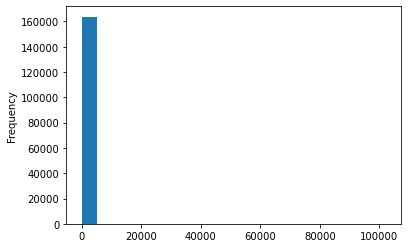

In [89]:
df_pcp2['Aluguel_m2'].plot.hist(bins=20)

<ipython-input-90-2cde169a5705>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alg1['log_Aluguel_m2'] = np.log(df_alg1['Aluguel_m2'])


<AxesSubplot:ylabel='Frequency'>

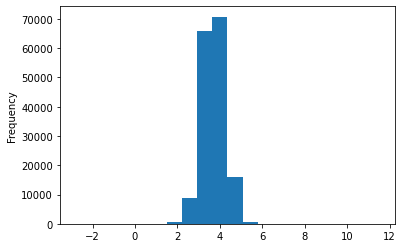

In [90]:
df_alg1['log_Aluguel_m2'] = np.log(df_alg1['Aluguel_m2'])
df_alg1['log_Aluguel_m2'].plot.hist(bins=20)

<ipython-input-91-1adbf843e543>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alg1['n_log_Aluguel_m2'] = ( df_alg1['log_Aluguel_m2'] - df_alg1['log_Aluguel_m2'].mean() ) / df_alg1['log_Aluguel_m2'].std()


<AxesSubplot:ylabel='Frequency'>

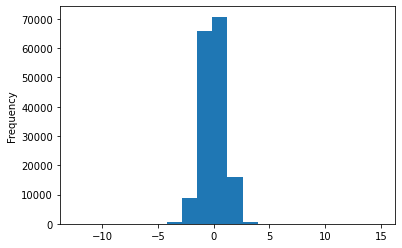

In [91]:
df_alg1['n_log_Aluguel_m2'] = ( df_alg1['log_Aluguel_m2'] - df_alg1['log_Aluguel_m2'].mean() ) / df_alg1['log_Aluguel_m2'].std()
df_alg1['n_log_Aluguel_m2'].plot.hist(bins=20)

In [92]:
print('Média quartos: {}'.format(df_alg1.Dormitorios.mean()))
print('Desvio padrão quartos: {}'.format(df_alg1.Dormitorios.std()))
print('.' * 65)
print('Média Aluguel/m2: {}'.format(np.mean(df_alg1.Aluguel_m2)))
print('Desvio padrão Aluguel/m2: {}'.format(df_alg1.Aluguel_m2.std()))

Média quartos: 2.1671834228702993
Desvio padrão quartos: 0.9210039690113607
.................................................................
Média Aluguel/m2: 50.56041305922878
Desvio padrão Aluguel/m2: 313.14234009432596


In [93]:
display(df_alg1.groupby(['Zona', 'Dormitorios', 'Portal']).Aluguel_m2.agg(['max', 'min', 'mean', 'std', 'size']))
# exportar com bairros no lugar do portal

max    min       mean         std  \
Zona       Dormitorios Portal                                                 
Centro     1           Viva Real     11818.18   0.85  70.688172  347.917353   
                       Zap Imóveis   18242.65   0.77  62.099405  302.840787   
           2           Viva Real       175.44   3.53  42.757873   19.521485   
                       Zap Imóveis   10691.57   2.21  47.211678  185.495056   
           3           Viva Real      7826.09   2.87  38.852064  114.682156   
                       Zap Imóveis     150.00   2.87  34.192996   14.447366   
           4           Viva Real        36.84  36.84  36.840000         NaN   
                       Zap Imóveis     115.27   5.00  35.165849   16.423767   
Zona Leste 1           Viva Real       100.00  12.79  45.532379   14.056569   
                       Zap Imóveis    3142.86   6.76  41.205477   77.351512   
           2           Viva Real      7068.97  12.22  44.422944  293.900887   
                       Zap Imóveis    2720.59   2.58  30.138901   53.218264   
           3           Viva Real        73.68   7.50  29.282132   11.183572   
                       Zap Imóveis   10975.61   6.00  29.600796  197.986354   
           4           Viva Real        20.18  20.18  20.180000         NaN   
                       Zap Imóveis     166.67   3.33  23.637205   13.446757   
Zona Norte 1           Viva Real        68.00  17.27  33.889068   10.618513   
                       Zap Imóveis     850.00   3.00  37.601743   33.996790   
           2           Viva Real        53.85   3.32  26.383825    7.267691   
                       Zap Imóveis    5000.00   3.80  31.084743  129.225602   
           3           Viva Real        76.00   3.18  24.761372    7.304182   
                       Zap Imóveis    3947.37   3.59  27.467657   97.549870   
           4           Zap Imóveis      86.82   5.88  22.747679   10.002899   
Zona Oeste 1           Viva Real       270.00  12.31  75.670135   32.143953   
                       Zap Imóveis   12888.89   0.06  72.893475  159.712717   
           2           Viva Real     10000.00  10.00  56.387597  194.300652   
                       Zap Imóveis   27777.78   2.11  49.710681  281.977556   
           3           Viva Real       197.37   5.12  45.913060   21.960795   
                       Zap Imóveis    7920.79   5.12  42.750669  127.985857   
           4           Viva Real        35.54  25.00  28.513333    6.085272   
                       Zap Imóveis    7058.82   4.18  44.272146  128.336402   
Zona Sul   1           Viva Real     10000.00   7.08  70.390606  315.683525   
                       Zap Imóveis   16190.48   1.83  68.854900  185.194758   
           2           Viva Real      8263.16   5.43  50.023575  240.979009   
                       Zap Imóveis   13076.92   5.33  48.165704  188.356479   
           3           Viva Real      9021.74   3.33  43.748024  123.315497   
                       Zap Imóveis  102222.22   1.00  50.528061  799.488014   
           4           Viva Real        67.86  27.98  44.853333   12.832931   
                       Zap Imóveis    3535.35   3.38  44.602071   53.246453   

                                     size  
Zona       Dormitorios Portal              
Centro     1           Viva Real     4937  
                       Zap Imóveis   8265  
           2           Viva Real     3015  
                       Zap Imóveis   4523  
           3           Viva Real     4711  
                       Zap Imóveis   3561  
           4           Viva Real        1  
                       Zap Imóveis    836  
Zona Leste 1           Viva Real      475  
                       Zap Imóveis   1689  
           2           Viva Real      574  
                       Zap Imóveis   3793  
           3           Viva Real      544  
                       Zap Imóveis   3068  
           4           Viva Real        1  
                       Zap Imóveis    526  
Zona Norte

[(0.0, 2000.0)]

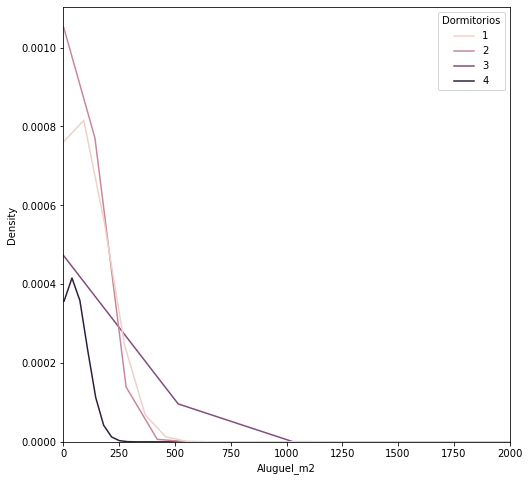

In [94]:
plt.figure(figsize=(8,8))
d_alm2 = sns.kdeplot(data=df_alg1, x="Aluguel_m2", hue='Dormitorios', bw_adjust=5, cut=0)
d_alm2.set(xlim=(0,2000))

In [95]:
# Agregando métricas 

df_alg1_agg = (df_alg1.groupby(["Dormitorios", 'Zona']).Aluguel_m2.agg(["mean", 'std', "count"]))

display(df_alg1_agg)

#sns.kdeplot(data=df_alg1_agg, x="Aluguel_m2", weights="count", hue='Zona')

mean         std  count
Dormitorios Zona                                    
1           Centro      65.310433  320.450255  13200
            Zona Leste  42.155236   68.671880   2164
            Zona Norte  37.331150   32.872607   2209
            Zona Oeste  73.439752  143.852638   9383
            Zona Sul    69.101363  211.618163  19746
2           Centro      45.432403  144.282902   7532
            Zona Leste  32.016400  117.556238   4367
            Zona Norte  30.475432  120.596627   3873
            Zona Oeste  51.053838  266.673524  13571
            Zona Sul    48.589783  201.577759  23920
3           Centro      36.845904   87.082405   8270
            Zona Leste  29.552789  182.511607   3611
            Zona Norte  27.084187   90.418792   2830
            Zona Oeste  43.858455  103.986260  14833
            Zona Sul    48.867383  697.386578  22316
4           Centro      35.167849   16.414043    837
            Zona Leste  23.630645   13.434813    527
            Zona Norte  22.747679   10.002899    530
            Zona Oeste  44.256791  128.274881   3079
            Zona Sul    44.602320   53.221359   6060

[(0.0, 2000.0)]

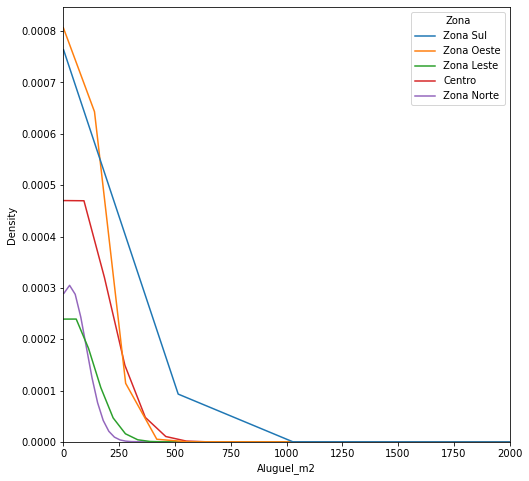

In [96]:
plt.figure(figsize=(8,8))
z_alm2 = sns.kdeplot(data=df_alg1, x="Aluguel_m2", hue='Zona', bw_adjust=5, cut=0)
z_alm2.set(xlim=(0,2000))

[(0.0, 2000.0)]

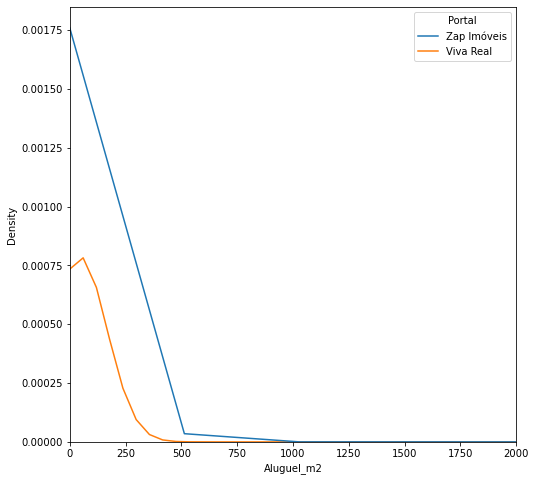

In [97]:
plt.figure(figsize=(8,8))
p_alm2 = sns.kdeplot(data=df_alg1, x="Aluguel_m2", hue='Portal', bw_adjust=5, cut=0)
p_alm2.set(xlim=(0,2000))

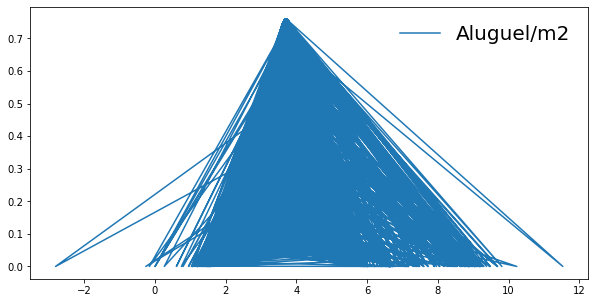

In [98]:
# criando uma figura com um gráfico 
fig, ax = plt.subplots(1, 1,figsize=(10,5))
# definindo os valores de x
x = df_alg1.log_Aluguel_m2 
# calculando a média
mu = df_alg1.log_Aluguel_m2.mean()
# calculando o desvio padrão populacional
sigma = df_alg1.log_Aluguel_m2.std()
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, st.norm.pdf(x=x,loc=mu, scale=sigma),label='Aluguel/m2')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()

In [110]:
# Verificando se há NaNs e infs na coluna

np.isnan(df_alg1['log_Aluguel_m2']).any()


True

In [111]:
df_alg1['log_Aluguel_m2'] = np.nan_to_num(df_alg1['log_Aluguel_m2'])

<ipython-input-111-069a5497f56e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alg1['log_Aluguel_m2'] = np.nan_to_num(df_alg1['log_Aluguel_m2'])


In [112]:
np.isnan(df_alg1['log_Aluguel_m2']).any()


False

In [109]:
np.isinf(df_alg1['log_Aluguel_m2']).any()

False

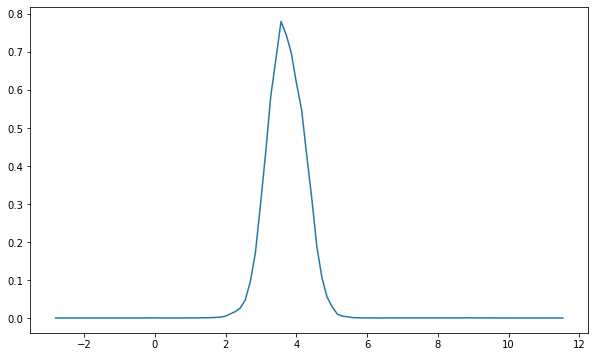

In [117]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(10,6))
# estabelecendo os dados
data = df_alg1['log_Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

Ainda preciso verificar esse código acima

#     
#      

### Algumas inferências sobre os bairros nas zonas
#     
#     

### Zona Sul

In [118]:
# considerando os dados somente da Zona Sul
zona_s = df_alg1[df_alg1.Zona == 'Zona Sul']
zona_s

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
7,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
15,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
17,2472227898,Zap Imóveis,Vila Congonhas,Zona Sul,São Paulo,Aluguel,500,1644,4800,145,4,1,2,4,33.10,8.476371,0.441101,3.499533,-0.395533
18,2472330983,Zap Imóveis,Bosque da Saúde,Zona Sul,São Paulo,Aluguel,1200,1800,3000,220,4,2,4,3,13.64,8.006368,-0.197160,2.613007,-2.081534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227348,2464749387,Zap Imóveis,Jardim Paulista,Zona Sul,São Paulo,Aluguel,0,450,1700,40,1,0,1,1,42.50,7.438384,-0.968477,3.749504,0.079863
227351,2470534574,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,204,1095,4200,100,2,0,1,2,42.00,8.342840,0.259766,3.737670,0.057356
227352,2458999378,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,110,0,1890,60,2,0,0,1,31.50,7.544332,-0.824600,3.449988,-0.489759
227354,2470862484,Zap Imóveis,Campo Belo,Zona Sul,São Paulo,Aluguel,180,560,3000,51,1,0,1,1,58.82,8.006368,-0.197160,4.074482,0.697907


<AxesSubplot:ylabel='Frequency'>

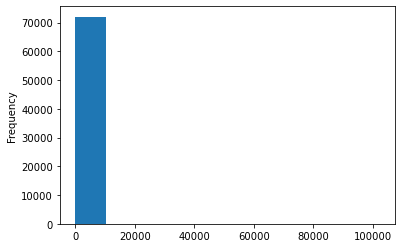

In [119]:
# distribuição dos dados
zona_s.Aluguel_m2.plot.hist(bins=10)

<ipython-input-120-4e4fe13f8431>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_s['log_Aluguel_m2'] = np.log(zona_s['Aluguel_m2'])


<AxesSubplot:>

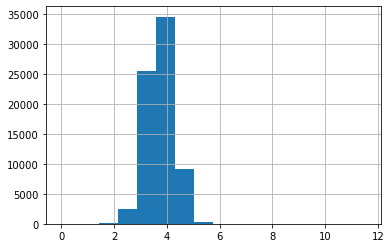

In [120]:
# criando uma coluna com o LOG Aluguel/m2 para a Z/S e plotando uma distribuição
zona_s['log_Aluguel_m2'] = np.log(zona_s['Aluguel_m2'])
zona_s['log_Aluguel_m2'].hist(bins=16)

In [122]:
np.isnan(zona_s['log_Aluguel_m2']).any()

True

In [123]:
zona_s['log_Aluguel_m2'] = np.nan_to_num(zona_s['log_Aluguel_m2'])

<ipython-input-123-cf1575b7dcad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_s['log_Aluguel_m2'] = np.nan_to_num(zona_s['log_Aluguel_m2'])


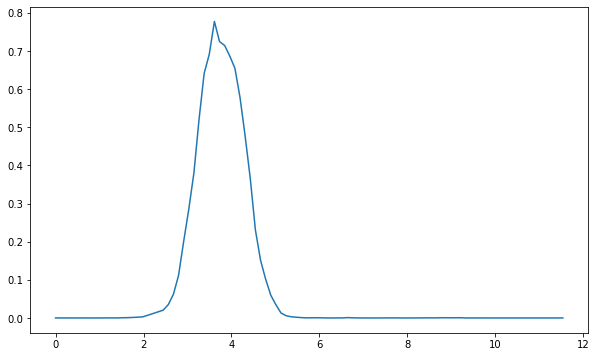

In [124]:
# KDE DA COLUNA LOG DO ALUGUEL/M2

plt.figure(figsize=(10,6))
# estabelecendo os dados
datas = zona_s['log_Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(datas)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(datas), max(datas), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

**COMO A DISTRIBUIÇÃO NORMAL É MUITO, MAS MUITO INCLINADA, A ESTIMATIVA DA DENSIDADE DO KERNEL (KDE) VAI SER
PRATICAMENTE IDÊNTICA À FUNÇÃO DE DENSIDADE PROBABILÍSTICA (PDF)**

In [40]:
# definindo os dados
x_zs = zona_s['log_Aluguel_m2']
# calculando a média 
mu_zs = np.mean(x_zs)
# calculando o desvio=padrão (utilizando o padrão para o Python)
std_zs = np.std(x_zs)
print('Média Zona Sul: {}'.format(mu_zs))
print('Desvio Padrão Zona Sul: {}'.format(std_zs))

Média Zona Sul: 3.7619859568602974
Desvio Padrão Zona Sul: 0.5178257234255994


In [41]:
# p-value para distribuição normal
st.norm(mu_zs, std_zs).pdf(2*std_zs)

7.369452328358805e-07

In [42]:
# z-score para distribuição normal
st.norm.interval(alpha=0.95,loc=mu_zs,scale=std_zs)

(2.7470661886777235, 4.776905725042871)

### Verificando bairros cujo aluguel maior e menor que a média

In [43]:
# Utilizando a estatística t-student
st.t.interval(alpha=0.95,
                       df=(len(zona_s['log_Aluguel_m2'])-1),
                       loc=mu_zs,scale=std_zs
                      ) 

# df=graus de liberdade

(2.747049136911339, 4.776922776809256)

In [44]:
# limite inferior
Z_score_inf_zs = st.t.interval(alpha=0.95,
                                         df=(len(zona_s['log_Aluguel_m2'])-1),
                                         loc=mu_zs,scale=std_zs
                                        )[0]
Z_score_inf_zs

2.747049136911339

In [45]:
# fazendo a inferência para o limite inferior com o teste t
zona_s[zona_s['log_Aluguel_m2']<Z_score_inf_zs]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
18,2472330983,Zap Imóveis,Bosque da Saúde,Zona Sul,São Paulo,Aluguel,1200,1800,3000,220,4,2,4,3,13.64,8.006368,-0.197160,2.613007,-2.081534
359,2476697302,Zap Imóveis,Bosque da Saúde,Zona Sul,São Paulo,Aluguel,136,300,1800,150,2,0,2,1,12.00,7.495542,-0.890856,2.484907,-2.325156
387,2479760349,Zap Imóveis,Vila Vera,Zona Sul,São Paulo,Aluguel,129,0,2150,189,4,1,2,3,11.38,7.673223,-0.649567,2.431857,-2.426045
428,2474143036,Zap Imóveis,Vila do Encontro,Zona Sul,São Paulo,Aluguel,338,609,1400,146,2,0,1,1,9.59,7.244228,-1.232139,2.260721,-2.751513
888,2473565781,Zap Imóveis,Ipiranga,Zona Sul,São Paulo,Aluguel,120,0,1800,140,3,0,1,3,12.86,7.495542,-0.890856,2.554122,-2.193522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227198,2500658439,Zap Imóveis,Jabaquara,Zona Sul,São Paulo,Aluguel,317,0,3000,213,3,1,2,4,14.08,8.006368,-0.197160,2.644755,-2.021154
227201,2500658763,Zap Imóveis,Campo Belo,Zona Sul,São Paulo,Aluguel,1000,0,8500,650,4,2,5,3,13.08,9.047821,1.217125,2.571084,-2.161262
227225,2500666402,Zap Imóveis,Jabaquara,Zona Sul,São Paulo,Aluguel,335,1800,4000,457,3,1,3,5,8.75,8.294050,0.193510,2.169054,-2.925846
227256,2500722096,Zap Imóveis,Vila Andrade,Zona Sul,São Paulo,Aluguel,450,1170,1800,120,3,1,2,2,15.00,7.495542,-0.890856,2.708050,-1.900780


In [46]:
# fazendo a inferência para o limite inferior com -1.89
zona_s[zona_s['log_Aluguel_m2']<-1.89]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2


In [47]:
# definindo o limite superior
Z_score_sup_zs = st.t.interval(alpha=0.95,
                                         df=(len(zona_s['log_Aluguel_m2'])-1),
                                         loc=mu_zs,scale=std_zs
                                        )[1]
Z_score_sup_zs

4.776922776809256

In [48]:
# fazendo a inferência para o limite superior com o teste t
zona_s[zona_s['log_Aluguel_m2']>Z_score_sup_zs]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
331,2474278587,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,50,300,2400,17,1,0,0,1,141.18,7.783224,-0.500187,4.950036,2.363040
2083,2475505794,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,0,0,12960,100,2,2,2,3,129.60,9.469623,1.789927,4.864453,2.200278
2176,2474279980,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,50,300,2400,17,1,0,0,1,141.18,7.783224,-0.500187,4.950036,2.363040
2965,2480795182,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,170,840,6000,45,1,1,1,2,133.33,8.699515,0.744127,4.892827,2.254241
3087,2474420696,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,300,1300,3600,30,1,0,1,1,120.00,8.188689,0.050431,4.787492,2.053913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224956,2499945479,Zap Imóveis,Vila Nova Conceição,Zona Sul,São Paulo,Aluguel,1600,1900,28000,234,4,3,4,5,119.66,10.239960,2.836037,4.784654,2.048517
225182,2500046729,Zap Imóveis,Vila Mascote,Zona Sul,São Paulo,Aluguel,0,0,123400,120,1,0,0,10,1028.33,11.723186,4.850245,6.935691,6.139371
225501,2500131331,Zap Imóveis,Vila Nova Conceição,Zona Sul,São Paulo,Aluguel,2670,958,7000,54,1,0,1,2,129.63,8.853665,0.953463,4.864684,2.200718
226040,2500233596,Zap Imóveis,Vila Olímpia,Zona Sul,São Paulo,Aluguel,500,1500,15000,120,3,2,0,3,125.00,9.615805,1.988442,4.828314,2.131549


In [49]:
# fazendo a inferência para o limite superior com 1.89
zona_s[zona_s['log_Aluguel_m2']>1.89]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
7,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
15,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
17,2472227898,Zap Imóveis,Vila Congonhas,Zona Sul,São Paulo,Aluguel,500,1644,4800,145,4,1,2,4,33.10,8.476371,0.441101,3.499533,-0.395533
18,2472330983,Zap Imóveis,Bosque da Saúde,Zona Sul,São Paulo,Aluguel,1200,1800,3000,220,4,2,4,3,13.64,8.006368,-0.197160,2.613007,-2.081534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227348,2464749387,Zap Imóveis,Jardim Paulista,Zona Sul,São Paulo,Aluguel,0,450,1700,40,1,0,1,1,42.50,7.438384,-0.968477,3.749504,0.079863
227351,2470534574,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,204,1095,4200,100,2,0,1,2,42.00,8.342840,0.259766,3.737670,0.057356
227352,2458999378,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,110,0,1890,60,2,0,0,1,31.50,7.544332,-0.824600,3.449988,-0.489759
227354,2470862484,Zap Imóveis,Campo Belo,Zona Sul,São Paulo,Aluguel,180,560,3000,51,1,0,1,1,58.82,8.006368,-0.197160,4.074482,0.697907


In [50]:
# calculando o valor máximo do log_Aluguel_m2
zona_s['log_Aluguel_m2'].max()

11.534904349949873

In [51]:
# calculando o nível de confiança para o maior Aluguel/m2
nivelmax_s = 1-st.t.sf(x=zona_s['log_Aluguel_m2'].max(), df=zona_s['log_Aluguel_m2'], loc=mu_zs, scale=std_zs)[0]
nivelmax_s

0.9999336680999735

#     
#      
### Zona Oeste

In [52]:
# considerando os dados somente da Zona Sul
zona_o = df_alg1[df_alg1.Zona == 'Zona Oeste']
zona_o

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50,7.003065,-1.559635,3.314186,-0.748028
2,2470281613,Zap Imóveis,Vila Romana,Zona Oeste,São Paulo,Aluguel,0,436,3000,120,3,0,1,0,25.00,8.006368,-0.197160,3.218876,-0.929289
3,2470329583,Zap Imóveis,Vila Sônia,Zona Oeste,São Paulo,Aluguel,348,2200,3500,130,3,3,3,3,26.92,8.160518,0.012175,3.292870,-0.788567
16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78,8.294050,0.193510,3.359681,-0.661506
20,2472437314,Zap Imóveis,Cerqueira César,Zona Oeste,São Paulo,Aluguel,250,150,3500,110,2,0,1,2,31.82,8.160518,0.012175,3.460095,-0.470537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227349,2473201481,Zap Imóveis,Vila Madalena,Zona Oeste,São Paulo,Aluguel,110,1381,3350,90,1,0,1,2,37.22,8.116716,-0.047308,3.616846,-0.172427
227350,2467050881,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,200,963,2800,98,2,0,1,2,28.57,7.937375,-0.290852,3.352357,-0.675433
227358,2466031374,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,134,1200,25,1,0,0,1,48.00,7.090077,-1.441474,3.871201,0.311307
227359,2465099798,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,133,401,2200,82,2,0,0,2,26.83,7.696213,-0.618347,3.289521,-0.794936


<AxesSubplot:ylabel='Frequency'>

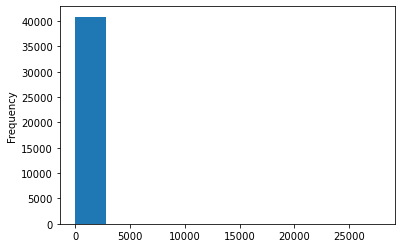

In [53]:
# distribuição dos dados
zona_o.Aluguel_m2.plot.hist(bins=10)

<ipython-input-54-cb314aae8f86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_o['log_Aluguel_m2'] = np.log(zona_o['Aluguel_m2'])


<AxesSubplot:>

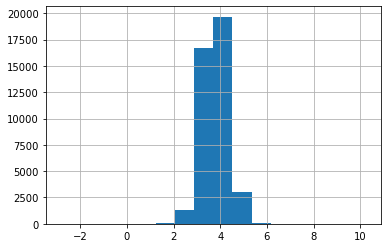

In [54]:
# criando uma coluna com o LOG Aluguel/m2 para a Z/O e plotando uma distribuição
zona_o['log_Aluguel_m2'] = np.log(zona_o['Aluguel_m2'])
zona_o['log_Aluguel_m2'].hist(bins=16)

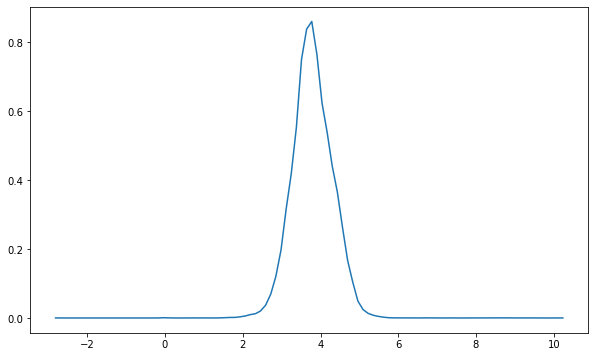

In [129]:
zona_o['log_Aluguel_m2'] = np.nan_to_num(zona_o['log_Aluguel_m2'])

# KDE DA COLUNA LOG DO ALUGUEL/M2

plt.figure(figsize=(10,6))
# estabelecendo os dados
datao = zona_o['log_Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(datao)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(datao), max(datao), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

In [55]:
# definindo os dados
x_zo = zona_o['log_Aluguel_m2']
# calculando a média 
mu_zo = np.mean(x_zo)
# calculando o desvio=padrão (utilizando o padrão para o Python)
std_zo = np.std(x_zo)
print('Média Zona Sul: {}'.format(mu_zo))
print('Desvio Padrão Zona Sul: {}'.format(std_zo))

Média Zona Sul: 3.7947676723733643
Desvio Padrão Zona Sul: 0.5113455937759914


In [56]:
# p-value para distribuição normal
st.norm(mu_zo, std_zo).pdf(2*std_zo)

3.239706341934751e-07

In [57]:
# z-score para distribuição normal
st.norm.interval(alpha=0.95,loc=mu_zo,scale=std_zo)

(2.7925487249191723, 4.796986619827557)

### Verificando bairros cujo aluguel maior e menor que a média

In [58]:
# Utilizando a estatística t-student
st.t.interval(alpha=0.95,
                       df=(len(zona_o['log_Aluguel_m2'])-1),
                       loc=mu_zo,scale=std_zo
                      ) 

# df=graus de liberdade

(2.7925190433494302, 4.797016301397298)

In [59]:
# limite inferior
Z_score_inf_zo = st.t.interval(alpha=0.95,
                                         df=(len(zona_o['log_Aluguel_m2'])-1),
                                         loc=mu_zo,scale=std_zo
                                        )[0]
Z_score_inf_zo

2.7925190433494302

In [60]:
# fazendo a inferência para o limite inferior com o teste t
zona_o[zona_o['log_Aluguel_m2']<Z_score_inf_zo]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
361,2476788334,Zap Imóveis,Lapa,Zona Oeste,São Paulo,Aluguel,2700,0,8000,900,3,3,8,2,8.89,8.987197,1.134797,2.184927,-2.895658
511,2471681596,Zap Imóveis,Vila Suzana,Zona Oeste,São Paulo,Aluguel,648,2175,1700,140,3,1,2,3,12.14,7.438384,-0.968477,2.496506,-2.303096
564,2476717681,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,450,0,4000,290,4,2,2,3,13.79,8.294050,0.193510,2.623944,-2.060734
846,2476829158,Zap Imóveis,Butantã,Zona Oeste,São Paulo,Aluguel,0,0,3950,244,3,1,5,3,16.19,8.281471,0.176428,2.784394,-1.755589
943,2478491952,Zap Imóveis,Sumaré,Zona Oeste,São Paulo,Aluguel,1167,2700,2650,230,3,1,3,4,11.52,7.882315,-0.365622,2.444085,-2.402791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225544,2500160583,Zap Imóveis,Vila Leopoldina,Zona Oeste,São Paulo,Aluguel,300,10,1500,100,2,0,0,1,15.00,7.313220,-1.138447,2.708050,-1.900780
226482,2500316296,Zap Imóveis,Sumaré,Zona Oeste,São Paulo,Aluguel,138,0,1800,136,2,0,0,1,13.24,7.495542,-0.890856,2.583243,-2.138140
226917,2500468781,Zap Imóveis,Butantã,Zona Oeste,São Paulo,Aluguel,0,0,2800,250,3,1,1,4,11.20,7.937375,-0.290852,2.415914,-2.456367
227058,2500539931,Zap Imóveis,Água Branca,Zona Oeste,São Paulo,Aluguel,0,460,1200,74,3,0,0,1,16.22,7.090077,-1.441474,2.786245,-1.752069


In [61]:
# fazendo a inferência para o limite inferior com -1.89
zona_o[zona_o['log_Aluguel_m2']<-1.89]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
96775,2473810199,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,100,0,3500,60000,1,0,0,2,0.06,8.160518,0.012175,-2.813411,-12.401524


In [62]:
# definindo o limite superior
Z_score_sup_zo = st.t.interval(alpha=0.95,
                                         df=(len(zona_o['log_Aluguel_m2'])-1),
                                         loc=mu_zo,scale=std_zo
                                        )[1]
Z_score_sup_zo

4.797016301397298

In [63]:
# fazendo a inferência para o limite superior com o teste t
zona_o[zona_o['log_Aluguel_m2']>Z_score_sup_zo]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
28,2472973391,Zap Imóveis,Itaim Bibi,Zona Oeste,São Paulo,Aluguel,250,2250,6800,40,2,0,0,3,170.00,8.824678,0.914098,5.135798,2.716325
54,2476347822,Zap Imóveis,Vila Nova Conceição,Zona Oeste,São Paulo,Aluguel,0,665,4700,30,1,1,1,1,156.67,8.455318,0.412510,5.054142,2.561030
105,2480820373,Zap Imóveis,Vila Olímpia,Zona Oeste,São Paulo,Aluguel,200,800,4070,26,1,1,1,1,156.54,8.311398,0.217069,5.053312,2.559451
315,2470580480,Zap Imóveis,Vila Nova Conceição,Zona Oeste,São Paulo,Aluguel,0,937,8523,57,1,1,0,1,149.53,9.050524,1.220794,5.007497,2.472321
316,2470670887,Zap Imóveis,Vila Nova Conceição,Zona Oeste,São Paulo,Aluguel,250,980,7000,54,1,1,1,2,129.63,8.853665,0.953463,4.864684,2.200718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220664,2499961209,Zap Imóveis,Butantã,Zona Oeste,São Paulo,Aluguel,10,0,10000,36,1,0,0,1,277.78,9.210340,1.437824,5.626829,3.650170
220917,2466035106,Zap Imóveis,Jardim Europa,Zona Oeste,São Paulo,Aluguel,5049,7304,50000,339,3,3,5,2,147.49,10.819778,3.623425,4.993760,2.446196
223490,2499105786,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,6500,14110,60,2,0,0,1,235.17,9.554639,1.905378,5.460309,3.333480
226747,2500378711,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,0,0,8000,64,2,1,1,2,125.00,8.987197,1.134797,4.828314,2.131549


In [64]:
# fazendo a inferência para o limite superior com 1.89
zona_o[zona_o['log_Aluguel_m2']>1.89]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50,7.003065,-1.559635,3.314186,-0.748028
2,2470281613,Zap Imóveis,Vila Romana,Zona Oeste,São Paulo,Aluguel,0,436,3000,120,3,0,1,0,25.00,8.006368,-0.197160,3.218876,-0.929289
3,2470329583,Zap Imóveis,Vila Sônia,Zona Oeste,São Paulo,Aluguel,348,2200,3500,130,3,3,3,3,26.92,8.160518,0.012175,3.292870,-0.788567
16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78,8.294050,0.193510,3.359681,-0.661506
20,2472437314,Zap Imóveis,Cerqueira César,Zona Oeste,São Paulo,Aluguel,250,150,3500,110,2,0,1,2,31.82,8.160518,0.012175,3.460095,-0.470537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227349,2473201481,Zap Imóveis,Vila Madalena,Zona Oeste,São Paulo,Aluguel,110,1381,3350,90,1,0,1,2,37.22,8.116716,-0.047308,3.616846,-0.172427
227350,2467050881,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,200,963,2800,98,2,0,1,2,28.57,7.937375,-0.290852,3.352357,-0.675433
227358,2466031374,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,134,1200,25,1,0,0,1,48.00,7.090077,-1.441474,3.871201,0.311307
227359,2465099798,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,133,401,2200,82,2,0,0,2,26.83,7.696213,-0.618347,3.289521,-0.794936


In [65]:
# calculando o valor máximo do log_Aluguel_m2
zona_o['log_Aluguel_m2'].max()

10.23199169950816

In [66]:
# calculando o nível de confiança para o maior Aluguel/m2
nivelmax_o = 1-st.t.sf(x=zona_o['log_Aluguel_m2'].max(), df=zona_o['log_Aluguel_m2'], loc=mu_zo, scale=std_zo)[0]
nivelmax_o

0.999674105482382

#     
#      
### Zona Central

In [67]:
# considerando os dados somente da Zona Sul
zona_c = df_alg1[df_alg1.Zona == 'Centro']
zona_c

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00,8.101678,-0.067730,4.700480,1.888435
13,2471352586,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,1144,9000,159,3,3,2,5,56.60,9.104980,1.294745,4.036009,0.624739
14,2471737382,Zap Imóveis,Cambuci,Centro,São Paulo,Aluguel,0,0,4400,103,2,2,1,3,42.72,8.389360,0.322940,3.754667,0.089682
19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29,11.982929,5.202973,2.659560,-1.992999
59,2476465605,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10,8.052615,-0.134357,5.056883,2.566242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227340,2454536488,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,118,612,2300,58,2,1,1,2,39.66,7.740664,-0.557982,3.680343,-0.051668
227345,2467635849,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,820,3000,5100,260,3,1,2,2,19.62,8.536996,0.523428,2.976549,-1.390147
227356,2441051781,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,0,508,1700,70,1,0,0,1,24.29,7.438384,-0.968477,3.190065,-0.984082
227357,2435705692,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,54,587,1500,40,1,0,0,1,37.50,7.313220,-1.138447,3.624341,-0.158173


<AxesSubplot:ylabel='Frequency'>

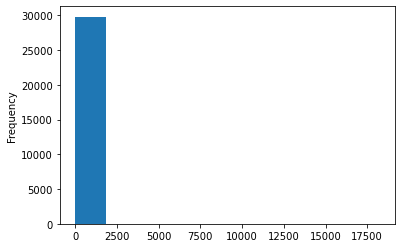

In [68]:
# distribuição dos dados
zona_c.Aluguel_m2.plot.hist(bins=10)

<ipython-input-69-f87577927461>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_c['log_Aluguel_m2'] = np.log(zona_c['Aluguel_m2'])


<AxesSubplot:>

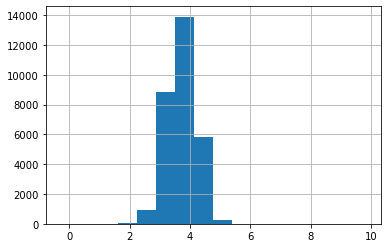

In [69]:
# criando uma coluna com o LOG Aluguel/m2 para a Z/O e plotando uma distribuição
zona_c['log_Aluguel_m2'] = np.log(zona_c['Aluguel_m2'])
zona_c['log_Aluguel_m2'].hist(bins=16)

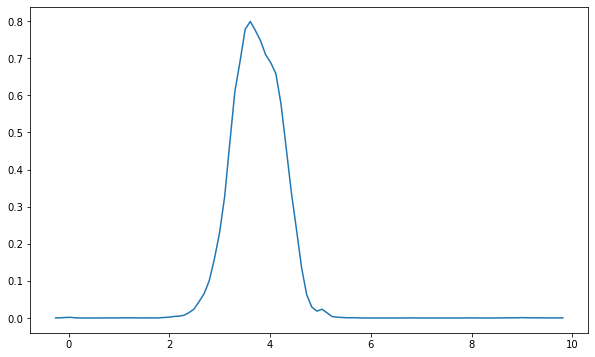

In [130]:
zona_c['log_Aluguel_m2'] = np.nan_to_num(zona_c['log_Aluguel_m2'])

# KDE DA COLUNA LOG DO ALUGUEL/M2

plt.figure(figsize=(10,6))
# estabelecendo os dados
datac = zona_c['log_Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(datac)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(datac), max(datac), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

In [70]:
# definindo os dados
x_zc = zona_c['log_Aluguel_m2']
# calculando a média 
mu_zc = np.mean(x_zc)
# calculando o desvio=padrão (utilizando o padrão para o Python)
std_zc = np.std(x_zo)
print('Média Zona Sul: {}'.format(mu_zc))
print('Desvio Padrão Zona Sul: {}'.format(std_zc))

Média Zona Sul: 3.7395229176397713
Desvio Padrão Zona Sul: 0.5113455937759914


In [71]:
# p-value para distribuição normal
st.norm(mu_zc, std_zc).pdf(2*std_zc)

5.785390120961981e-07

In [72]:
# z-score para distribuição normal
st.norm.interval(alpha=0.95,loc=mu_zc,scale=std_zc)

(2.7373039701855792, 4.741741865093964)

### Verificando bairros cujo aluguel maior e menor que a média

In [73]:
# Utilizando a estatística t-student
st.t.interval(alpha=0.95,
                       df=(len(zona_c['log_Aluguel_m2'])-1),
                       loc=mu_zc,scale=std_zc
                      ) 

# df=graus de liberdade

(2.7372633276367857, 4.741782507642757)

In [74]:
# limite inferior
Z_score_inf_zc = st.t.interval(alpha=0.95,
                                         df=(len(zona_c['log_Aluguel_m2'])-1),
                                         loc=mu_zc,scale=std_zc
                                        )[0]
Z_score_inf_zc

2.7372633276367857

In [75]:
# fazendo a inferência para o limite inferior com o teste t
zona_c[zona_c['log_Aluguel_m2']<Z_score_inf_zc]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29,11.982929,5.202973,2.659560,-1.992999
989,2474466075,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,53,780,1600,109,2,0,0,2,14.68,7.377759,-1.050805,2.686486,-1.941791
2228,2478617484,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,5000,7500,4000,280,3,3,6,5,14.29,8.294050,0.193510,2.659560,-1.992999
2624,2473215301,Zap Imóveis,Santa Cecília,Centro,São Paulo,Aluguel,550,2090,4800,330,3,0,3,3,14.55,8.476371,0.441101,2.677591,-1.958707
3463,2476451186,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,448,2124,3000,201,3,0,1,0,14.93,8.006368,-0.197160,2.703373,-1.909676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224654,2499816058,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,2000,7000,9000,640,4,2,3,3,14.06,9.104980,1.294745,2.643334,-2.023858
224832,2499910692,Zap Imóveis,Santa Cecília,Centro,São Paulo,Aluguel,0,650,1350,300,1,1,0,1,4.50,7.207860,-1.281526,1.504077,-4.190502
225736,2500174823,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,34,2700,4000,404,3,0,0,3,9.90,8.294050,0.193510,2.292535,-2.691009
226286,2500294118,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,486,2427,3151,215,3,1,1,2,14.66,8.055475,-0.130472,2.685123,-1.944384


In [76]:
# fazendo a inferência para o limite inferior com -1.89
zona_c[zona_c['log_Aluguel_m2']<-1.89]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2


In [77]:
# definindo o limite superior
Z_score_sup_zc = st.t.interval(alpha=0.95,
                                         df=(len(zona_c['log_Aluguel_m2'])-1),
                                         loc=mu_zc,scale=std_zc
                                        )[1]
Z_score_sup_zc

4.741782507642757

In [78]:
# fazendo a inferência para o limite superior com o teste t
zona_c[zona_c['log_Aluguel_m2']>Z_score_sup_zc]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
59,2476465605,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10,8.052615,-0.134357,5.056883,2.566242
62,2476467685,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10,8.052615,-0.134357,5.056883,2.566242
1014,2476463910,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10,8.052615,-0.134357,5.056883,2.566242
3159,2479936975,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,0,540,3500,30,1,0,1,1,116.67,8.160518,0.012175,4.759349,2.000392
4073,2480706108,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,1160,3100,22000,181,2,2,3,4,121.55,9.998798,2.508541,4.800326,2.078321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224347,2499561428,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,49,450,2700,18,1,1,0,1,150.00,7.901007,-0.340239,5.010635,2.478289
224901,2499928524,Zap Imóveis,Santa Cecília,Centro,São Paulo,Aluguel,54,260,1750,11,1,0,0,1,159.09,7.467371,-0.929112,5.069470,2.590181
225935,2500211237,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,100,666,3000,22,1,1,1,1,136.36,8.006368,-0.197160,4.915298,2.296977
226876,2500427491,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,106,490,7700,50,1,1,1,1,154.00,8.948976,1.082893,5.036953,2.528339


In [79]:
# fazendo a inferência para o limite superior com 1.89
zona_c[zona_c['log_Aluguel_m2']>1.89]

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00,8.101678,-0.067730,4.700480,1.888435
13,2471352586,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,1144,9000,159,3,3,2,5,56.60,9.104980,1.294745,4.036009,0.624739
14,2471737382,Zap Imóveis,Cambuci,Centro,São Paulo,Aluguel,0,0,4400,103,2,2,1,3,42.72,8.389360,0.322940,3.754667,0.089682
19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29,11.982929,5.202973,2.659560,-1.992999
59,2476465605,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10,8.052615,-0.134357,5.056883,2.566242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227340,2454536488,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,118,612,2300,58,2,1,1,2,39.66,7.740664,-0.557982,3.680343,-0.051668
227345,2467635849,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,820,3000,5100,260,3,1,2,2,19.62,8.536996,0.523428,2.976549,-1.390147
227356,2441051781,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,0,508,1700,70,1,0,0,1,24.29,7.438384,-0.968477,3.190065,-0.984082
227357,2435705692,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,54,587,1500,40,1,0,0,1,37.50,7.313220,-1.138447,3.624341,-0.158173


In [80]:
# calculando o valor máximo do log_Aluguel_m2
zona_c['log_Aluguel_m2'].max()

9.811517538163185

In [81]:
# calculando o nível de confiança para o maior Aluguel/m2
nivelmax_c = 1-st.t.sf(x=zona_c['log_Aluguel_m2'].max(), df=zona_c['log_Aluguel_m2'], loc=mu_zc, scale=std_zc)[0]
nivelmax_c

0.999944805584883